determine indicators of heavy traffic on I-94

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.shape

(48204, 9)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

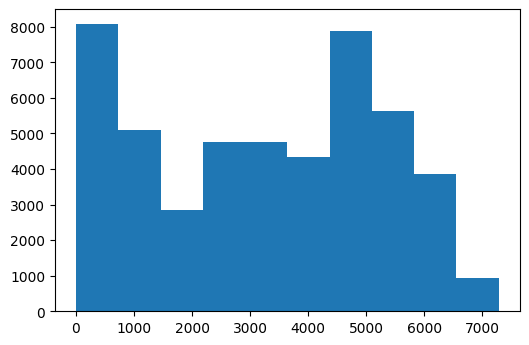

In [7]:
plt.hist(df["traffic_volume"])

In [8]:
df["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

starting - daytime-2012-10-02 9am & nighttime -2018-09-30 11 pm the traffic 
volumne ranges from 0 - 7280 which mean 3259

In [9]:
df["date_time"] =  pd.to_datetime(df["date_time"])

In [10]:
df.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [12]:
day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)
night = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


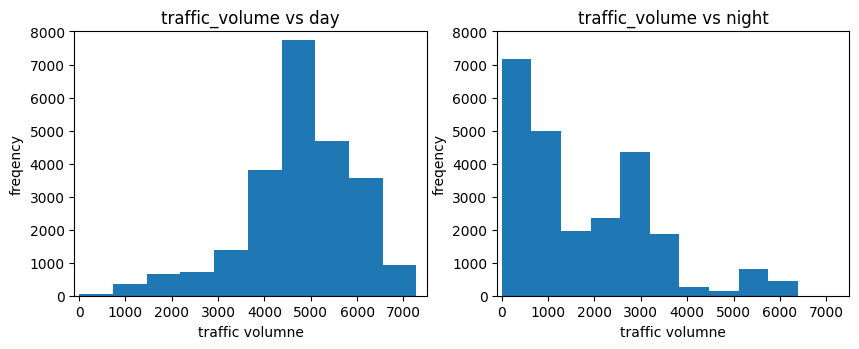

In [18]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title("traffic_volume vs day")
plt.xlabel("traffic volumne")
plt.ylabel("freqency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title("traffic_volume vs night")
plt.xlabel("traffic volumne")
plt.ylabel("freqency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.show()



In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [19]:
day['month'] = day['date_time'].dt.month

In [22]:
day.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10


In [24]:
by_month = day.groupby('month').mean()

In [25]:
by_month.head(3)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560


In [26]:
by_month.traffic_volume

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

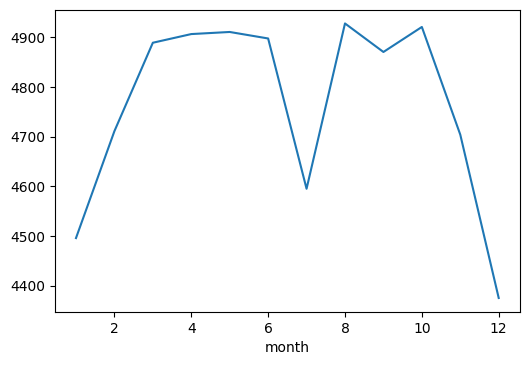

In [30]:
by_month['traffic_volume'].plot.line()
plt.show()

In [31]:
day['year'] = day['date_time'].dt.year

In [32]:
by_year = day.groupby('year').mean()

In [33]:
by_year

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
year,,,,,,
2012,275.846975,0.000000,0.000000,66.133997,4675.346861,11.062787
2013,280.003337,0.134236,0.000000,53.891145,4834.084298,6.236600
2014,278.152433,0.287366,0.000000,51.987912,4765.309296,3.918299
2015,289.060314,0.237949,0.002233,43.819580,4748.448485,9.042424
2016,283.675922,2.269275,0.000274,52.542247,4637.518293,6.942509
2017,282.341220,0.000000,0.000000,54.954867,4865.961752,6.499904
2018,283.825283,0.135757,0.000000,51.989171,4726.280534,5.088643


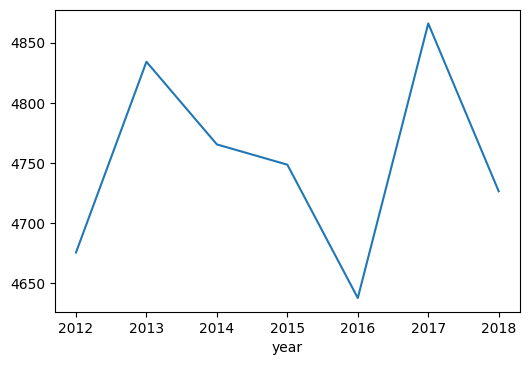

In [35]:
by_year['traffic_volume'].plot.line()
plt.show()

In [37]:
day['dayofweek'] = day['date_time'].dt.dayofweek

In [39]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1


In [42]:
by_dateofweek = day.groupby('dayofweek').mean()

In [43]:
by_dateofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

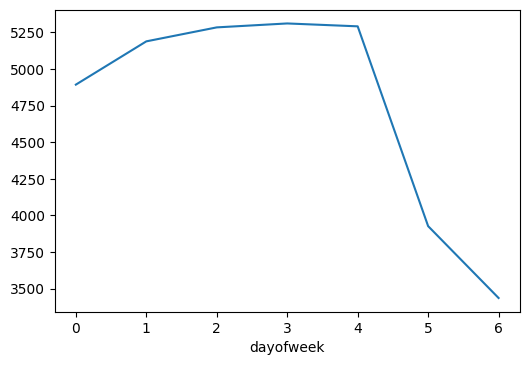

In [47]:
by_dateofweek['traffic_volume'].plot.line()
plt.show

plotting for time of the day

In [49]:
day['hour'] = day['date_time'].dt.hour

In [53]:
day['hour'].describe()

count    23877.000000
mean        12.431419
std          3.473405
min          7.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: hour, dtype: float64

In [54]:
bussiness_day =  day.copy()[day['dayofweek']<=4]
weekend = day.copy()[day['dayofweek']>=5]
by_hour_business = bussiness_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

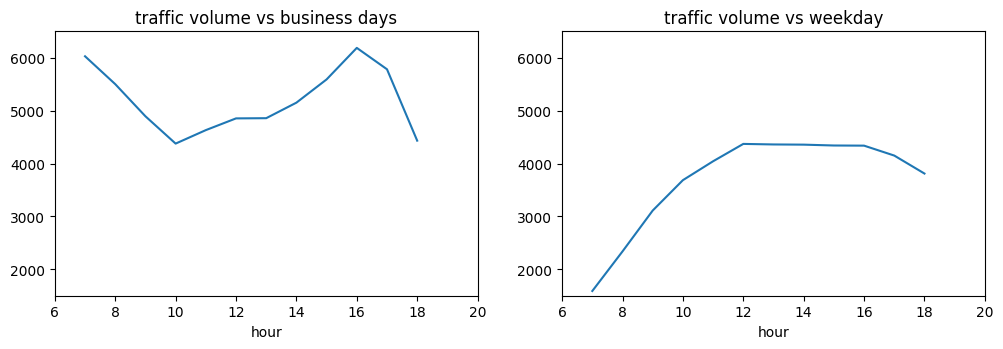

In [57]:
plt.figure(figsize=(12,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("traffic volume vs business days")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("traffic volume vs weekday")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()


Now we will look at the weather indicator

In [59]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

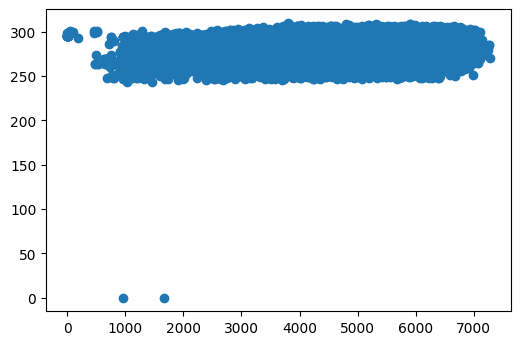

In [62]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.show()

there are two outliers in temp hence we will plot without them

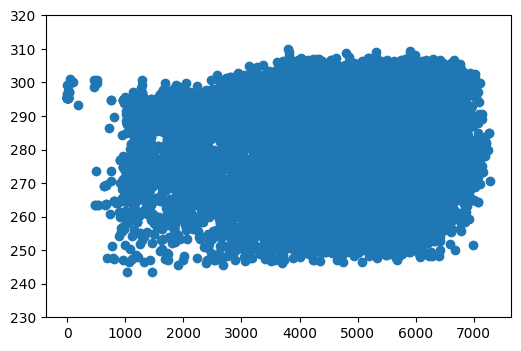

In [64]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.ylim(230,320)
plt.show()

In [68]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_desc = day.groupby('weather_description').mean()

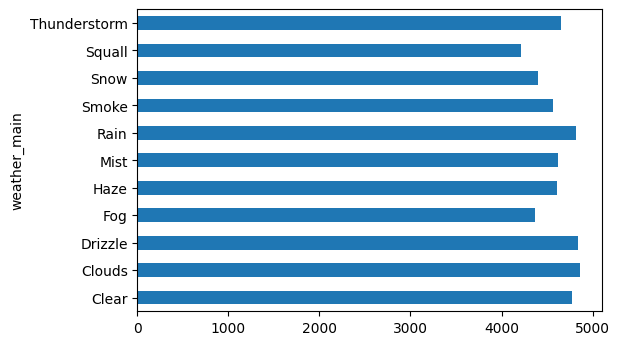

In [76]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

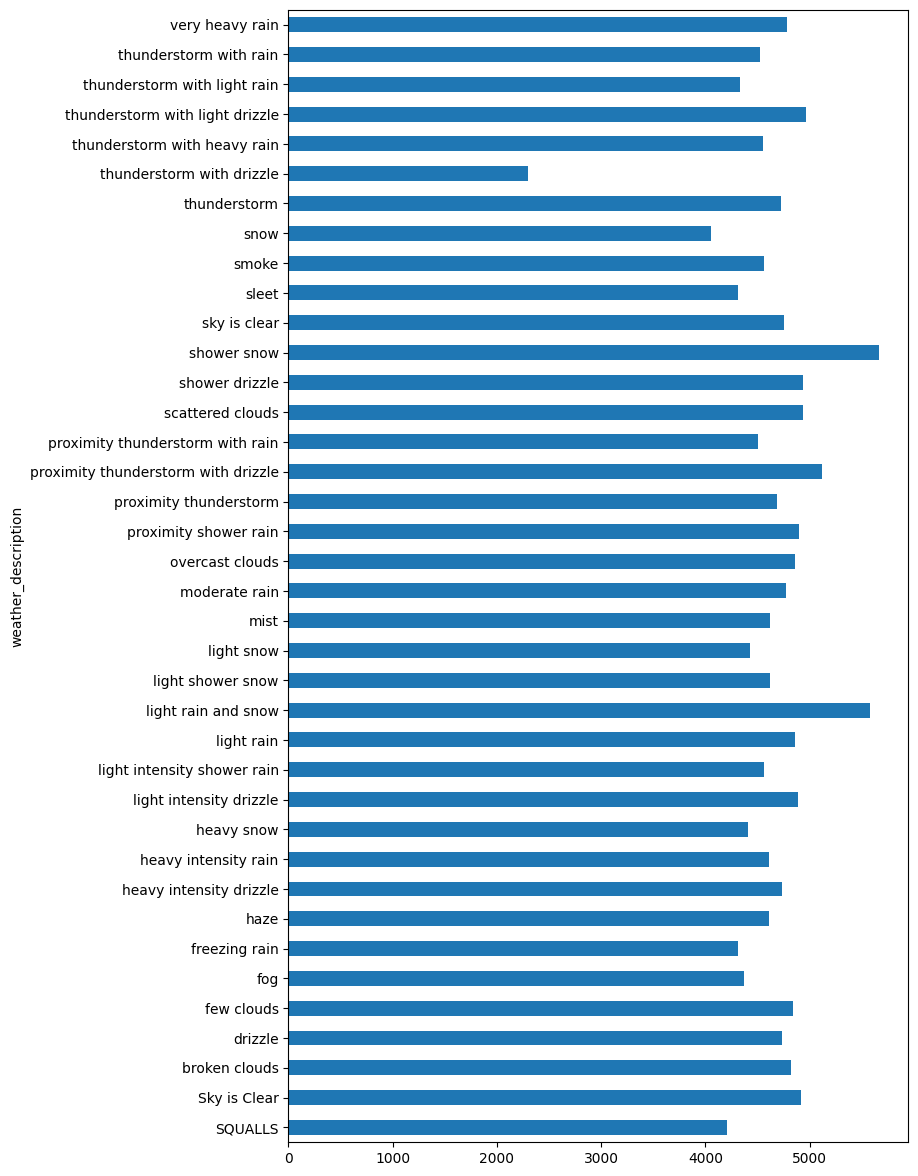

In [84]:
by_weather_desc['traffic_volume'].plot.barh(figsize=(8,15))
plt.show()